# Linear and Non Linear Models

# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

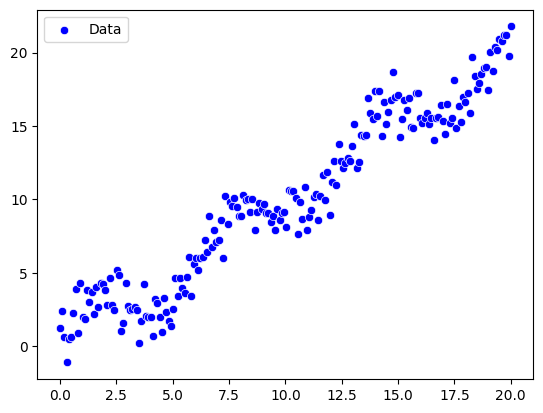

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)
#

In [5]:
df[0]


(tensor([0.]), tensor([1.2830]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [7]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[9.7666]])]

In [ ]:
# construct the model using Linear block
in_features = 1
out_features = 1
model_2 = nn.Linear(in_features,out_features)


In [ ]:
loss_fn = nn.MSELoss()

In [ ]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [14]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            # print(running_loss)



In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device

'cpu'

In [ ]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=10
                )


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.660121917724609
30.028884887695312
32.20011878013611
32.23681320250034
32.57127772271633
53.528427228331566
55.155343398451805
60.54068933427334
66.21770749986172
66.24961749464273
70.09200660139322
71.36631754785776
71.42177975177765
71.45549692213535
74.11391152441502
74.39890499413013
75.49565215408802
77.63773293793201
78.37912632524967
80.59753204882145
87.86042667925358
88.12068550288677
102.23678390681744
103.03630135953426
104.93069432675838
106.95786546170712
110.5735142081976
111.26505725085735
113.65600053966045
122.8009065836668
123.0418332517147
136.56651148200035
154.19091257452965
160.48049053549767
162.9860344827175
163.7473763525486
168.28606072068214
169.03190979361534
169.09572972357273
183.5383843332529
187.62072552740574
191.72102250158787
191.98200772702694
191.99045348912477
192.13749144226313
194.75948617607355
195.89353153854609
196.30593461543322
196.5871012583375
201.3466236963868
202.79020289331675
217.10893610864878
217.78270951658487
217.8457921296358
21

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.754680156707764
6.2888898849487305
7.165796995162964
8.939900994300842
9.788806140422821
9.82691065594554
18.65757529065013
19.97133271023631
20.625995855778456
26.47879670187831
28.87858698889613
29.759094338864088
30.891773086041212
40.51076493784785
42.71780739352107
43.699957709759474
44.929954152554274
45.5679178647697
45.70551521703601
49.46893699094653
49.597421299666166
49.72521397098899
50.76979407295585
51.55564823374152
51.748691853135824
54.232273157685995
83.25419050082564
87.61475997790694
88.78129165992141
97.84023636206985
99.7006590925157
102.40181403979659
102.4038062216714
102.66369299311191
103.65804187674075
105.53439025301486
105.69583669025451
110.12202706653625
111.22127940971404
113.55955436546355
115.72341420967132
120.65706422645599
121.86928799469024
128.0954070361331
128.89881089050323
135.06426241714507
135.80046209413558
135.80938127450645
137.7172094862908
139.3256445210427
139.84963717870414
145.01706710271537
148.42092767171562
148.8591965418309
149.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.333247184753418
5.401938207447529
5.4041807651519775
5.484374240040779
5.618144735693932
7.7762091010808945
10.525450691580772
10.542125096544623
10.765878951177001
12.427061712369323
12.609837343916297
21.865196039900184
25.66814904473722
26.56142400763929
43.679721584543586
45.90103744529188
48.7496528532356
50.028083791956306
50.47319265268743
50.94782709144056
51.638404896482825
51.71453353576362
51.872312439605594
51.88201795704663
51.89351693447679
51.898324142210186
51.922820528037846
52.31305937934667
56.36915354896337
57.17145418096334
73.18030618596822
75.20516561437398
75.66257058549672
87.18548261094838
94.38807450700551
96.24127577710897
101.10011290479451
106.13784693647176
108.7434258358553
113.97560404706746
114.38087760377675
114.6781878368929
119.93703078199178
122.6148676769808
128.19174717832357
136.3351588146761
136.35319536644965
139.14983004052192
140.35632019955665
142.35707574803382
144.0737965675071
144.0745882699266
145.10543355438858
145.42851147148758
146

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5067564845085144
1.0562604069709778
5.006523668766022
16.322296679019928
17.659269154071808
31.65288335084915
32.88015276193619
35.44407397508621
35.52288344502449
46.0775308907032
50.42244389653206
52.207367807626724
52.49662110209465
60.0907196700573
63.927536219358444
64.205353140831
82.73444020748138
86.87495028972626
102.07644641399384
105.85548317432404
108.37190926074982
108.83011695742607
110.7945029437542
113.58251067996025
115.63050839304924
116.06900441646576
116.10519681870937
120.27958427369595
120.28705558506772
123.77441653935239
123.79234362347052
125.76237965328619
127.99562884075567
128.73547596437857
130.5287819574587
131.32783389789984
134.08267999393865
140.04862666828558
141.30741382343695
142.61932183010504
142.74997980101034
144.13746935827658
146.20055515272543
146.87267786962911
147.6040715049021
151.78552330238745
158.91390932304785
174.99813402397558
178.02604521019384
178.0552788726054
180.40198311721906
182.2317242375575
183.2701261988841
183.94148132717

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.09588810801506042
2.1217083632946014
2.6368742287158966
2.6462263548746705
4.519479938782752
4.523438396863639
4.644842970184982
16.909085142426193
17.098833578638732
25.030929583124816
29.521975534968078
32.244297998957336
34.201722281984985
34.80673529487103
35.04211354535073
35.596493425779045
37.99014777224511
38.019298986531794
38.049009402282536
39.26404507923871
40.87300511170179
48.85593004990369
49.51365550328046
51.672521193511784
52.79529937077314
54.55113621521741
55.87136395741254
60.831204255111516
60.88783368933946
62.45768079627305
66.90203151572496
71.25375184882432
81.42686185706407
81.42866585985757
81.4444167597685
83.34564924077131
84.19735705689527
84.33847315446474
86.35739834443666
92.28496296540834
93.00319953099824
93.09884799853899
98.41345704928972
100.42962707416154
101.97483266727068
102.22315130964853
105.05615101591684
105.68529383675195
111.49318186775781
113.29722647205926
114.42171911732294
115.82641868130304
124.91187934414484
124.92011610348709
12

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.614198207855225
6.900051832199097
6.919402653351426
7.8873179499059916
15.957826906815171
16.337247813120484
17.997799480333924
18.05827527679503
23.394729668274522
24.939586693421006
29.17713170684874
29.204602723941207
31.88053131662309
32.66825324855745
34.84240538440645
43.951958721503615
45.65826923213899
48.035900419577956
54.14356881938875
54.8525440748781
54.85580921033397
68.15890407422557
71.14596390584484
72.03302323678508
72.04708826588467
72.04909819480963
74.33169454452582
74.6526985776145
74.69792481255718
77.6978070337791
81.8082315523643
83.81244607758708
90.50690456223674
90.51614176039584
98.80578027968295
98.87365044211037
116.55719841574319
136.30899895285256
138.86003578756936
140.34221244906075
143.29258133028634
146.23883415316232
149.575653801905
152.20371628855355
157.37250329111703
158.08070589159615
159.65977192972787
160.05793599341996
160.83837697957642
165.02836702321656
167.84032843564637
174.38231966947205
175.93749926541932
175.95837173541076
180.240

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7252334356307983
2.605081796646118
4.958873987197876
5.316859662532806
8.835814893245697
16.96344894170761
17.06242659687996
17.115912333130836
23.301206961274147
25.919013872742653
26.15666565299034
29.02825102210045
38.709740966558456
39.04656249284744
39.97842592000961
45.463036954402924
45.4689654619433
47.47037594625726
64.14660923788324
65.51173835108057
70.56640057871118
75.78647427866235
78.80515914270654
80.57191603491083
85.88960354635492
86.60748778888956
89.4826458604075
91.50060092518106
92.40566270658746
92.56045793602243
96.87456392357126
98.60562180588022
102.59568690368906
103.07537539908662
104.35534020373598
107.00006504962221
107.05981134111062
115.01372646028176
117.3414072864689
117.83645208412781
118.65580632025376
133.02242733770981
134.01288815075532
139.1271211677231
140.9181571775116
141.57765574986115
146.63961501652375
147.02404679590836
149.70406903559342
153.8048161440529
158.18858947092667
158.5610957914032
159.58932645851746
159.62847588816658
159.668

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.989051818847656
7.117561414837837
7.210856139659882
7.210869314269075
12.54969024856473
14.383530737952242
15.99675405223752
17.71656012733365
17.86947266955758
19.746424602464685
27.110340045885096
27.1492052507856
30.340153975532303
30.340279884843767
31.663305469064653
31.69512398189181
35.53111488765353
38.25588090366
38.272981438993156
39.32386866605157
40.78893366849297
44.92262736356133
48.9877208808648
56.82548419034356
59.17763200795525
63.9708067516076
66.8727556804406
66.88754018975669
67.68828263713294
67.70962033627802
68.92546508668238
71.99437377808863
73.83855281232172
73.95118842480952
74.22088713405901
77.8238586878615
87.44326443432146
88.47073907612139
94.15538091419512
94.1574992402202
94.19555834817947
94.68114141511978
96.65134302663864
96.92068130660118
101.56216938185753
109.24518758940758
109.82774669814171
114.3261097161776
127.47008783507408
129.81773740935387
130.33369279789986
133.01767803120674
133.08270552146496
136.01115491378368
143.15259387481274
14

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.346214294433594
7.570947229862213
8.199713408946991
10.586237609386444
17.614018619060516
21.1915220618248
21.652815490961075
22.163857966661453
32.43958619236946
38.27685597538948
40.0447715818882
42.83792582154274
43.055016577243805
43.385768592357635
43.39549058210105
43.83833091985434
43.92357142549008
48.379948931746185
50.967385369352996
57.38342578988522
57.38502273650374
63.293540097191
63.40314993204083
71.89885649026837
72.64159098209348
73.1814825827023
79.40400388778653
79.88770341814961
79.92465001286473
96.95364552678075
97.39733540953603
101.43070399702992
101.68656971992459
106.52784445823636
109.51764205039944
110.27401921094861
123.38629051984753
128.87023398221936
130.57170388044324
130.57228935707826
130.59966372337658
133.26899050560314
134.00742249574978
134.37421702232677
137.59438442077953
140.3064117321046
142.25866376247723
142.40088254597504
142.45061475795228
143.01425118010957
152.1631617025705
164.3583750204416
167.3784982637735
170.43050546210725
181.01

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.950544595718384
4.237252801656723
6.646976798772812
7.66376456618309
8.139964669942856
8.299660474061966
8.343912426382303
16.433983150869608
21.585569206625223
23.50481528416276
23.508979422505945
26.85563169186935
30.454281670507044
32.84789763158187
34.71210632985458
41.14648495381698
42.9484627074562
46.58940170472488
55.41936538880691
55.4257922982797
56.42304190155119
59.340329251252115
60.00795914884657
65.58073832746595
72.36603572126478
75.96417739149183
77.54016031976789
81.40518727060407
81.84207015391439
88.82089619990438
89.73449914809316
90.72069781180471
90.72801944147795
91.61113282572478
91.81206392776221
92.16767245065421
92.86585181485862
96.46859877835959
97.89611249696463
99.35832994710654
102.49887960683554
102.66971663665026
103.85805455874652
106.23602167796344
107.65407101344317
107.7035564025864
122.24102531280369
126.51512466277927
128.56172524299473
137.8750148853287
138.88231228198856
139.53529123868793
140.4094617208466
141.28397284355015
141.29662843886

In [ ]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

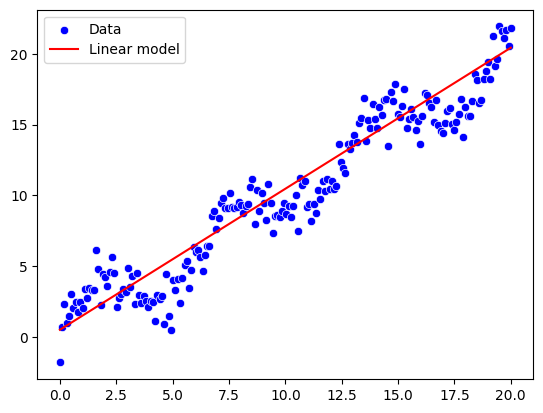

In [ ]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')


## Non Linear Model

In [9]:
import torch
import numpy as np
import seaborn as sns
from torch import nn
from torch.utils.data import Dataset, DataLoader
from tqdm.autonotebook import tqdm

<ipython-input-9-8dc01a41f81a>:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [74]:
class NonLinearModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(NonLinearModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, out_features)
        )

    def forward(self, x):
        return self.model(x)


In [75]:
in_features = 1
out_features = 1
model_nonlinear = NonLinearModel(in_features, out_features)

In [76]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model_nonlinear.parameters(), lr=0.01)


In [77]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_simple_network(model_nonlinear, loss_fn, training_loader, device=device, epochs=10)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.889209747314453
240.31889724731445
242.37553882598877
245.39911580085754
245.9650040268898
256.4282217621803
418.68916231393814
433.46158796548843
436.947852909565
439.85771375894547
529.457460463047
533.2737351059914
547.8453570008278
991.616902410984
1316.4778338074684
1509.5904894471169
1631.1748171448708
1635.712683737278
1646.5411949753761
1780.304103910923
1791.147004187107
1797.6801424622536
1797.932235956192
1798.216830164194
1954.0430935919285
1988.4452466070652
2211.3205975592136
2410.9384259283543
2687.168864160776
2788.04811373353
2817.6790112555027
2912.016329675913
2912.330798327923
3100.2191802859306
3153.935118854046
3156.8752354979515
3156.9139215499163
3171.9850971251726
3194.875964358449
3244.0037757903337
3244.5753055363894
3287.1582561284304
3288.228781655431
3288.431081548333
3302.083406224847
3334.8336618095636
3411.590833440423
3413.4571377187967
3429.8129307180643
3499.96998180449
3503.4485083967447
3505.144737020135
3505.923383668065
3514.352009728551
3520.3

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.4526207447052002
28.37457776069641
92.66409039497375
265.8868839740753
267.9634692668915
271.1890184879303
352.6062777042389
352.62290639057755
356.2832228578627
357.935269895941
402.7672820724547
552.1917510665953
661.3198180831969
876.1928649581969
950.1861053146422
999.3194823898375
1003.3440075553954
1006.0311585105956
1012.6394410766661
1072.2291284240782
1072.503911767155
1072.6171963624656
1236.3514798097312
1459.1100705079734
1466.9835913591087
1632.2009222917259
1686.9389441423118
1699.6792414598167
1761.2389681749046
1962.7313235215843
2051.2177279405296
2051.2177564393696
2153.3402997743306
2486.1145002137837
2486.3163713853774
2488.634128753465
2489.9159045856413
2859.2569690387663
2859.286821814623
2859.3006612690133
2884.8059942157906
2885.1497213872117
2935.796255353276
2986.861166241948
2986.96844005156
2998.7684574084324
3001.623958583359
3241.0911521868748
3493.663738246445
3535.137786860947
3576.4795494036716
3576.768469388966
3710.5393281536144
3710.5880199218136


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.6652380228042603
224.61833250522614
335.42097532749176
480.8577581644058
498.3287168741226
626.9921079874039
639.2924276590347
671.6077009439468
673.4709695577621
685.7196048498154
698.2997125387192
720.8096231222153
727.2356756925583
857.8141821622849
966.4772146940231
980.9711216688156
987.6376894712448
1008.8113650083542
1011.1123913526535
1011.2285462617874
1019.4568005800247
1041.472366452217
1046.3426934480667
1145.2277871370316
1155.5137568712234
1371.5777827501297
1468.865357518196
1600.432938694954
1792.3643046617508
1813.7488261461258
1823.8444157838821
1833.346730351448
1838.7927957773209
1849.8304191827774
1857.9111782312393
2088.7583309412003
2212.7069774866104
2215.839641213417
2217.662343144417
2217.664823793806
2259.759462618269
2315.1942847007886
2379.1884558433667
2412.13453128282
2428.086068415083
2484.2798626655713
2633.635560297407
2633.743506872095
2709.7682871455327
2722.9042782420292
2727.145870649256
2768.227543317713
2773.485808813013
2780.4014978045598
2782

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

36.749755859375
36.77495759166777
105.43794434703887
105.92217596806586
117.23482188023627
157.87486323155463
158.47490682639182
166.88163557089865
167.3609740678221
168.1979703847319
214.14932536520064
214.20331160537899
222.94024054519832
224.45326845161617
244.7616714667529
322.614843768999
348.3252433966845
358.38517515175045
360.4195844363421
362.73274366371334
362.7818466555327
433.49159396998584
472.683591498062
499.4139324557036
543.6958538424224
553.3213182818145
553.5117993932217
589.3334889989346
644.0707173924893
737.888886032626
780.4557576756924
780.8243680577725
899.5525861363858
925.297785339877
958.9667993169278
959.7250720839947
1100.0359546523541
1107.9191309791058
1166.5342203956097
1293.883677182719
1296.1422268729657
1296.6403240542859
1343.2506450992078
1343.2663787677884
1353.367644675076
1475.0309137180448
1475.62448579818
1480.377885170281
1485.8428419306874
1506.2080877497792
1516.239089794457
1518.3901379778981
1529.650177307427
1534.0370267108083
1534.67537

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.4795641899108887
11.842723369598389
16.253421783447266
22.76968479156494
52.516154289245605
87.18021297454834
87.51018553972244
123.79559355974197
152.28468924760818
264.65084677934647
274.61679488420486
277.41140776872635
307.14955550432205
318.38025122880936
322.8552926182747
361.65602427721024
450.49968272447586
462.77249747514725
519.630232155323
536.2121279835701
536.3847164660692
548.200066998601
548.5465182811022
594.1761378794909
600.19639582932
654.355476334691
654.900548234582
678.4909260421991
753.5104725509882
835.773984208703
852.189044252038
867.1428930908442
875.562636628747
894.4508679062128
900.832252278924
911.5587537437677
928.3952310234308
1018.5524804741144
1043.5413053184748
1092.693897023797
1150.3405873924494
1160.3479802757502
1160.962292984128
1183.915423706174
1185.5882796794176
1201.3667239695787
1206.484464123845
1225.9459051638842
1244.7828802615404
1289.0280966311693
1319.042720273137
1336.323825314641
1360.2678560763597
1366.8850688487291
1374.46109814

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

19.562847137451172
25.976786136627197
43.60642862319946
71.37081575393677
109.05214738845825
122.52204751968384
130.96708345413208
248.33223390579224
261.6875901222229
262.44944965839386
283.4959317445755
310.2054444551468
355.3739358186722
382.33112156391144
384.409383893013
399.6339007616043
451.874245762825
455.81705582141876
463.5791813135147
466.21683180332184
466.2169008013152
466.797781860485
481.3413342591666
494.4120816346549
518.8081692811393
526.1997293588065
542.4783052560233
595.7459062692069
601.1661676522635
630.6842741128348
634.5470365640067
659.015452777996
701.0597261544608
701.3096622582816
704.84783235754
723.7270590421103
752.148239767208
764.3396841641807
777.5134007092856
815.7769734021567
848.0263630505942
848.1452047135972
896.0301191117906
918.3577749040269
951.649049928441
964.9201537873887
1013.073477914586
1016.7919177320146
1036.9333342816972
1040.6760811116837
1040.9998988118314
1057.101224800601
1077.5089777913236
1115.8852976765775
1120.4434055295133
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

27.155132293701172
27.845895171165466
42.48541295528412
59.29092824459076
60.19825965166092
92.6075194478035
110.6289923787117
111.97595089673996
136.61794537305832
137.44700866937637
138.29989451169968
186.15314692258835
196.41719073057175
198.44664496183395
214.0113384127617
276.39996832609177
310.020447909832
340.4433242678642
344.6116973757744
351.9035660624504
371.5065819621086
382.9197613596916
382.95833944156766
383.37815414741635
385.0299768336117
385.3202177770436
429.79460971429944
453.81363551691175
476.64839999750257
499.73871867731214
500.32473604753613
599.5325683839619
618.6290172822773
643.8148273713887
644.0496498085558
665.9328208900988
673.3499055840075
690.4230924583972
695.700821492821
696.4352760054171
725.9033832289279
739.9093150831759
780.9107265211642
802.839542362839
830.5782222487032
833.0045420862734
840.8621237017214
892.5544340349734
956.9653684832156
971.7532255388796
973.6679894663393
977.5516941286623
977.5536432981025
977.5902205302846
981.73828085209

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.466745376586914
13.850244045257568
45.05525350570679
48.25901198387146
59.231834173202515
59.815777122974396
86.73904448747635
117.78028327226639
137.12021857500076
139.7278614640236
160.14336210489273
160.40026605129242
189.38333451747894
249.36101472377777
258.55007684230804
327.2988942861557
332.42653357982635
332.6415365040302
332.78467459976673
333.66445012390614
340.5445298701525
340.84253446757793
343.5689558237791
359.4897541254759
359.5411741808057
368.4446175172925
400.0401108339429
464.89931035786867
483.8135845735669
492.31134343892336
502.25130868703127
583.0041544511914
611.9356482103467
612.2062510624528
615.7380451336503
620.9598902836442
642.1465834751725
657.2725505009294
670.7500199452043
670.9381144717336
673.378424949944
676.972813911736
680.852719374001
680.9958141669631
681.5833181366324
682.9937846884131
683.727641068399
694.3102492913604
699.4559926614165
709.734944306314
749.5733193978667
756.4744276627898
756.6435900107026
766.4480457678437
786.70308498293

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.39211294054985046
0.39231891599774826
7.85953206983686
8.111954521809821
9.844894957219367
19.94634015527845
32.13405282465101
36.22119719949842
38.64899833170057
40.74603373972059
41.61552752224088
48.53525532451749
51.68906296459318
52.79492951599241
55.856848728333716
59.346127760087256
66.0853474256146
71.45032526222349
73.80193139282346
73.80884894863993
73.86695945770771
76.87246287376911
87.46900046379596
92.03976119072468
99.11118281395466
109.37372839958698
111.27285230667621
132.63020742447407
143.09675729782612
171.67261636765033
171.8574100187543
175.6691685369733
205.71708494932682
253.4912014654401
305.5766621282819
308.2314985445264
312.6951912096265
322.88994867117435
342.92709237844974
343.17575425417454
343.1822107471089
362.8772829211812
386.3633802569966
388.70910579334304
471.28000575672195
531.5873521007161
538.5718315280537
542.4749587215047
547.7177789844136
548.297483865128
549.2742157615285
549.3949334658246
549.7023689187627
557.2154142297368
589.0593759454

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

70.66412353515625
74.34394955635071
74.47950030863285
103.79866839945316
106.05110098421574
106.07122686877847
107.57390025630593
109.4952258206904
114.15038910880685
117.87025609984994
117.87219618540257
119.06150578241795
123.22258518915623
123.35727758985013
126.24699493031949
127.4685079632327
132.9296986637637
144.49478693585843
144.874734419398
147.3212425885722
147.34336009342223
153.20719638187438
153.21235521649942
156.64397962903604
197.4540878138505
258.0879455409013
258.1109627778642
264.54103651596233
275.11880102707073
275.4430432613008
280.30921128345653
299.56642487598583
299.5681602586992
305.1875373949297
306.0201891292818
306.36933439271525
306.6358224977739
314.4390008081682
321.10047980444506
343.25058051245287
353.4446103204973
380.3212144006975
380.990130268503
391.0699814190157
396.2976044048555
417.61102374689654
427.99249919550493
446.4596260418184
450.78621610300615
450.79303872492164
453.5972429504618
474.93427526857704
475.6888959398493
485.4117953768
488.7

<Axes: >

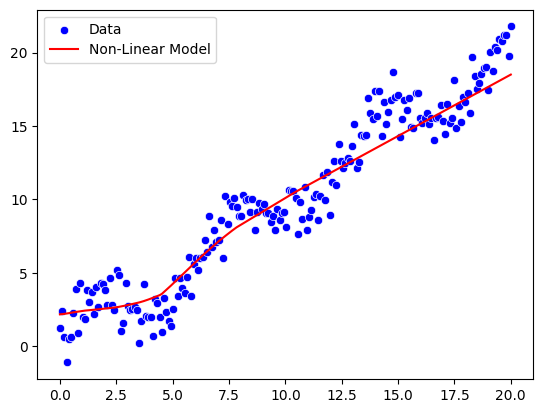

In [78]:
model_nonlinear.to('cpu')
model_nonlinear.eval()

with torch.inference_mode():
    y_pred_nonlinear = model_nonlinear(torch.tensor(X, dtype=torch.float32).reshape(-1, 1)).cpu().numpy()

sns.scatterplot(x=X, y=y, color='blue', label='Data')
sns.lineplot(x=X, y=y_pred_nonlinear.ravel(), color='red', label='Non-Linear Model')